### Sales Forecast

**Motivation! What's the context?**
- In 2017 Olist started to forecast its monthly sales based on the average revenue from 3 months before. But now the company wants to be able to predict future sales more accurately with a wider time range (3 months).

**Why?**
- To efficiently allocate resources for future projects, growth and manage its cash flow. 

**Who are the stakeholders?**
- The financial sector will use the forecast to the set operating budgets and to project cash flows.
- And the marketing team, who will have the opportunity to schedule promotions if it appears sales <br>
will be weak and will be able to better allocate budget among other marketing activities.

**What is the deliverable?**
- A dashboard with the information about the forecast.


> **ps: We will use the data to forecast the second quarter of 2018 and the third quarter will be our "production data".**

## Agenda

[0.0 Loading Data](#0.0-Loading-Data)<br>
&nbsp;[0.1 Train and Test Data Frame](#0.1-Train-and-Test-Data-Frame)<br>

[1.0 ARIMA](#1.0-ARIMA)<br>

[2.0 Final Model](#2.0-Final-Model)<br>

[3.0 Results](#3.0-Results)<br>

[4.0 Storytelling](#4.0-Storytelling)

In [1]:
from notebook_utils.utils import *
from notebook_utils.ml_utils import *

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
directory = Directory("1.4-pr-sales-prediction-arima")

## 0.0 Loading Data

Since We are not preprocessing any data we can use the project proposal serie itself.

In [3]:
df = pd.read_pickle(os.path.join(os.path.join(directory.DATA_DIR, 'sales_forecast_data'), 'olist_2017_forecasts_table_model.pkl'))
dates_index = ['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31']
df.index = pd.to_datetime(dates_index)
annual_forecast = df.copy()
df.round(2)

,known_revenue,estimated_revenue
2017-01-31,127482.37,15551.25
2017-02-28,271239.32,57997.55
2017-03-31,414330.95,132913.77
2017-04-30,390812.40,271017.55
2017-05-31,566851.40,358794.22
2017-06-30,490050.37,457331.58
2017-07-31,566299.08,482571.39
2017-08-31,645832.36,541066.95
2017-09-30,701077.49,567393.94
2017-10-31,751117.01,637736.31


### 0.1 Train and Test Data Frame

In [4]:
training_data = df.loc['2017-01-31':'2018-03-31', 'known_revenue']
testing_data = df.loc['2018-04-30':'2018-06-30', 'known_revenue']
production_data = df.loc['2018-07-31':, 'known_revenue']

## 1.0 ARIMA

    We beat the baseline. Now We can retrain the model including the 
    testing data and then forecast the production data expecting an 
    error of 5.7% above or below the real revenue value.

In [5]:
model = ARIMA(training_data.values, order=(2,0,0)).fit()
test_predictions = model.forecast(3)

evaluation(testing_data, test_predictions, "2nd Quarter of 2018")

2nd Quarter of 2018
On average, our predictions are 5.7% above or below the real value.
Which means an error of about R$ 64,127.08


(64127.08, 5.7032082465927845)

In [6]:
# print(model.summary())

## 2.0 Final Model

In [7]:
x_train = df.loc['2017-01-31':'2018-06-30', 'known_revenue']

In [8]:
model = ARIMA(x_train.values, order=(2,0,0)).fit()
predictions = model.forecast(2)

evaluation(production_data, predictions, "3rd Quarter of 2018")

3rd Quarter of 2018
On average, our predictions are 3.18% above or below the real value.
Which means an error of about R$ 31,915.91


(31915.91, 3.1836173098377953)

## 3.0 Results

**We would have done great! Arima's Forecast would have an error lower than the moving average predictions.**

In [9]:
evaluation(production_data, df.loc['2018-07-31':, "estimated_revenue"], "Moving Average Error");

Moving Average Error
On average, our predictions are 5.29% above or below the real value.
Which means an error of about R$ 52,777.88


## 4.0 Storytelling

In [10]:
df['arima_forecast'] = np.concatenate( ( np.zeros(df['known_revenue'][:-5].shape), test_predictions, predictions ) )
df.loc[:'2018-03-31', 'arima_forecast'] = np.nan

**In the beginning of this project, Olist moving average predictive model has been showing large errors, even though it was getting lower.**

In [11]:
initial_environment = df.copy()
initial_environment['error'] = initial_environment['known_revenue'] - initial_environment['estimated_revenue']
# initial_environment.index

In [12]:
q1 = initial_environment.loc[['2017-01-31', '2017-02-28', '2017-03-31']]
q2 = initial_environment.loc[['2017-04-30', '2017-05-31', '2017-06-30']]
q3 = initial_environment.loc[['2017-07-31', '2017-08-31', '2017-09-30']]
q4 = initial_environment.loc[['2017-10-31', '2017-11-30', '2017-12-31']]

evaluation(q1['known_revenue'], q1['estimated_revenue'], "1st Quarter of 2017")
evaluation(q2['known_revenue'], q2['estimated_revenue'], "\n2nd Quarter of 2017")
evaluation(q3['known_revenue'], q3['estimated_revenue'], "\n3rd Quarter of 2017")
evaluation(q4['known_revenue'], q4['estimated_revenue'], "\n4th Quarter of 2017")

q1 = initial_environment.loc[['2018-01-31', '2018-02-28', '2018-03-31']]
q2 = initial_environment.loc[['2018-04-30', '2018-05-31', '2018-06-30']]
evaluation(q1['known_revenue'], q1['estimated_revenue'], "\n\n1st Quarter of 2018")
evaluation(q2['known_revenue'], q2['estimated_revenue'], "\n2nd Quarter of 2018");

1st Quarter of 2017
On average, our predictions are 78.11% above or below the real value.
Which means an error of about R$ 202,196.69

2nd Quarter of 2017
On average, our predictions are 24.68% above or below the real value.
Which means an error of about R$ 120,190.27

3rd Quarter of 2017
On average, our predictions are 16.69% above or below the real value.
Which means an error of about R$ 107,392.22

4th Quarter of 2017
On average, our predictions are 19.16% above or below the real value.
Which means an error of about R$ 197,614.63


1st Quarter of 2018
On average, our predictions are 11.74% above or below the real value.
Which means an error of about R$ 126,287.57

2nd Quarter of 2018
On average, our predictions are 6.75% above or below the real value.
Which means an error of about R$ 73,935.56


**For the next Quarter, Olist needs a model with an error lower than 6.75%.**

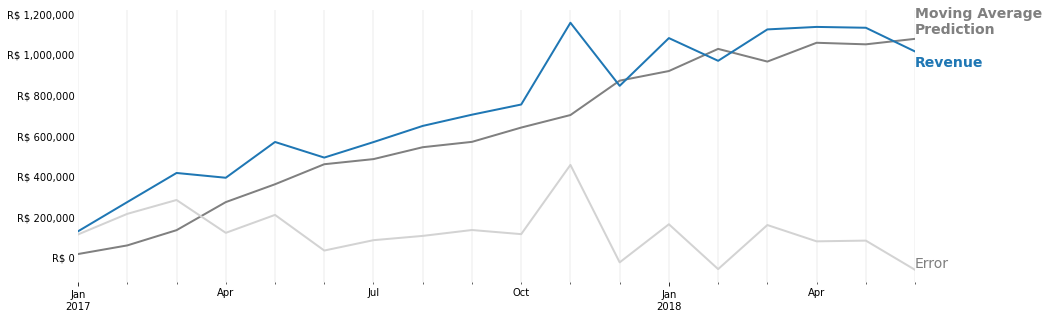

In [13]:
aux = initial_environment.drop(pd.to_datetime(['2018-07-31', '2018-08-31']))
x = '2018-06-30'
plt.box(False)
aux['estimated_revenue'].plot(figsize=(15,5), color=['grey'], linewidth=2);
ax = aux['known_revenue'].plot(color=['#1f77b4'], linewidth=2);
aux['error'].plot(color=['lightgrey'], linewidth=2);
plt.text(x=x, y=940000, s="Revenue", color='#1f77b4', size=14, weight='bold')
plt.text(x=x, y=1100000, s="Moving Average\nPrediction", color='grey', size=14, weight='bold')
plt.text(x=x, y=-50000, s="Error", color='grey', size=14)
plt.tick_params(axis='y', length=0)
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

**The Project was successful, since We could deacrease the error when predicting the sales from second quarter of 2018. Now, Olist can forecast the 3rd quarter expecting an error of 5.7% above or below the real revenue value, instead of 6.7%.**

**And... Yes, after two months of trial the arima model has been showing to be a more accurate model.**

In [14]:
known_revenue = df['known_revenue']
arima_forecast = known_revenue.copy()
arima_forecast.loc['2018-04-30':'2018-09-30'] = df.loc['2018-04-30':'2018-09-30', 'arima_forecast']
estimated_revenue = known_revenue.copy()
estimated_revenue.loc['2018-04-30':'2018-09-30'] = df.loc['2018-04-30':'2018-09-30', 'estimated_revenue']

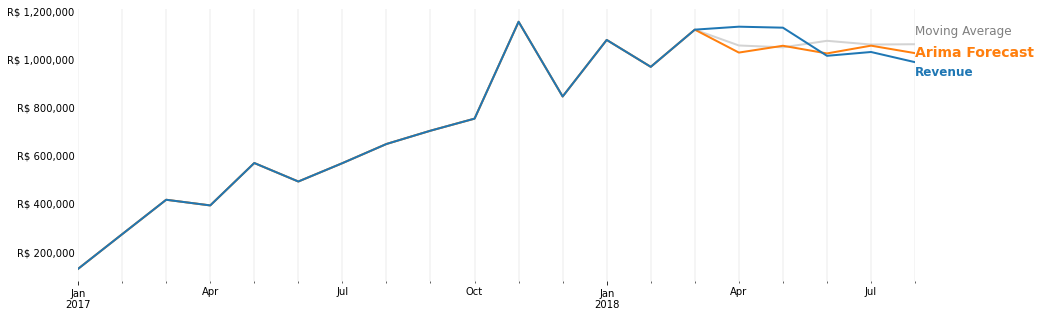

In [15]:
x = '2018-08-31'
plt.box(False)
estimated_revenue.plot(color='lightgrey', label='estimated_revenue', linewidth=2)
arima_forecast.plot(color='#ff7f0e', label='arima_forecast', linewidth=2)
ax = known_revenue.plot(figsize=(15,5), color = '#1f77b4', label='known_revenue', linewidth=2)
plt.text(x=x , y=1100000, s="Moving Average", color='grey', size=12)
plt.text(x=x , y=1010000, s="Arima Forecast", color='#ff7f0e', size=14,  weight='bold')
plt.text(x=x , y=930000, s="Revenue", color='#1f77b4', size=12,  weight='bold')

plt.tick_params(axis='y', length=0)
plt.grid(axis='x', which='both', linewidth=.25)
plt.ticklabel_format(axis="y", style="plain")
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
plt.show()

**So, now, Olist can forecast 3 months ahead instead of 1 and more accurately than it has been doing.**